# Project: Diamond Price Prediction

In [62]:
#Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px

from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

from sklearn import metrics 

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 1. Upload the Dataset

Kaggle Dataset Link: https://www.kaggle.com/datasets/swatikhedekar/price-prediction-of-diamond?select=diamonds.csv

This dataset is sourced from Kaggle and contains information related to diamond features such as carat weight, cut, color, clarity, and dimensions, along with their corresponding prices. This dataset will be utilized to build a regression model for predicting diamond prices based on their attributes.

In [63]:
df = pd.read_csv('diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### 2. Describe the Dataset:

In [64]:
df.shape

(53940, 11)

This dataset contains 53940 observations of dimaonds and 11 features. Here is the description of each feature:
-   Carat: This represents the diamond’s physical weight measured in metric carats. It ranges from 0.2 to 5.01.
-   Cut: This attribute describes the quality of the cut, categorized into Fair, Good, Very Good, Premium, and Ideal.
-   Color: The color of gem-quality diamonds, ranging from J (worst) to D (best). The color of diamonds can vary from colorless to light yellow or light brown.
-   Clarity: This describes the clarity of the diamond, categorized from I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1,  to IF (best).
-   Depth: The total depth percentage, calculated as the ratio of the depth of the diamond (in millimeters) to the mean of its length and width. It ranges from 43 to 79.
-   X: Length of the diamond (in mm), ranging from 0 to 10.74.
-   Y: Width of the diamond (in mm), ranging from 0 to 58.9.
-   Z: Depth of the diamond (in mm), ranging from 0 to 31.8.
-   Table: The width of the top of the diamond relative to its widest point, expressed as a percentage. It ranges from 43 to 95.
-   Price: This is the target variable, representing the price of the diamond in US dollars. It ranges from $326 to $18826.


In [65]:
# basic data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [66]:
# check null values
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

**Note:** All attributes in the dataset have complete information for all 53,940 diamonds, indicating the absence of any missing data.

In [67]:
# descriptive statistics of the numerical columns
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Key Observations:** 
-   The "Unnamed:0" column seems to represent an index or ID for the diamond,ranging from 1 to 53940. This column will be eliminated because it doesn't provide substantial insights into the diamonds' characteristics.
-   Some diamonds in the dataset have dimensions of zero (x,y, and z), which contradicts the expected physical properties of diamonds, as they inherently possess measurable size.  This may indicate missing or incorrect data entries. 
-  Diamond prices vary significantly, with a minimum of $326 and a maximum of $18823.The average price is approximately $3932.80, suggesting a diverse range of diamond qualities and sizes represented in the dataset.


In [68]:
# descriptive statistics for categorical columns
df.describe(include='object')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


**Note:** The data types for features such as 'cut', 'color', and 'clarity' are categorized as "object", which will require conversion into numerical variables. 

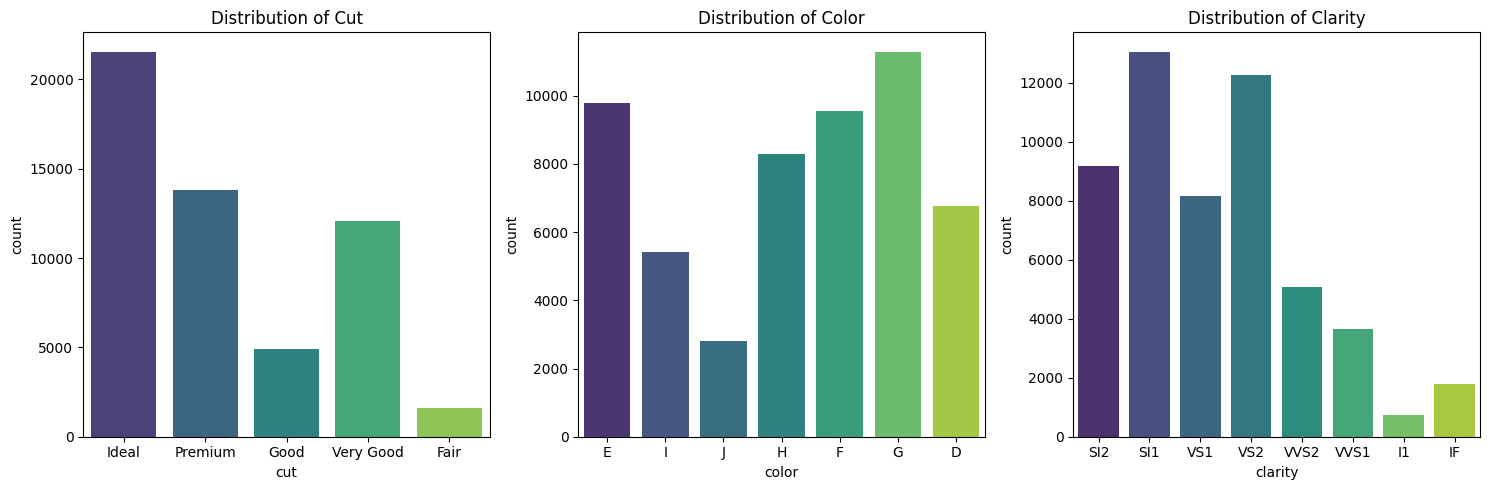

In [69]:
#Visualization of the distributions of the categorical columns before the cleaning process and encoding.
def create_barplots(df):
    # Create bar plots for 'cut', 'color', and 'clarity'
    plt.figure(figsize=(15, 5))
    
    # Bar plot for 'cut'
    plt.subplot(1, 3, 1)
    sns.countplot(x='cut', data=df, palette='viridis')
    plt.title('Distribution of Cut')

    # Bar plot for 'color'
    plt.subplot(1, 3, 2)
    sns.countplot(x='color', data=df, palette='viridis')
    plt.title('Distribution of Color')

    # Bar plot for 'clarity'
    plt.subplot(1, 3, 3)
    sns.countplot(x='clarity', data=df, palette='viridis')
    plt.title('Distribution of Clarity')

    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame
create_barplots(df)

### 3. Perform Data Wrangling/Encoding:

In [70]:
# Removing the feature "Unnamed"
df = df.drop(["Unnamed: 0"], axis=1)
df.shape


(53940, 10)

In [71]:
#Finding the duplicates
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


**Note:** There are 146 duplicate observations in the dataset. It's crucial to remove these duplicates before training the machine learning model for predicting diamond prices. Duplicate entries can skew the model's learning process and lead to inaccurate predictions.

In [72]:
# Droping duplicate observations
df.drop_duplicates(inplace=True)
df.shape

(53794, 10)

In [73]:
# Removing the datapoints having min 0 value in either x, y or z features 
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53775, 10)

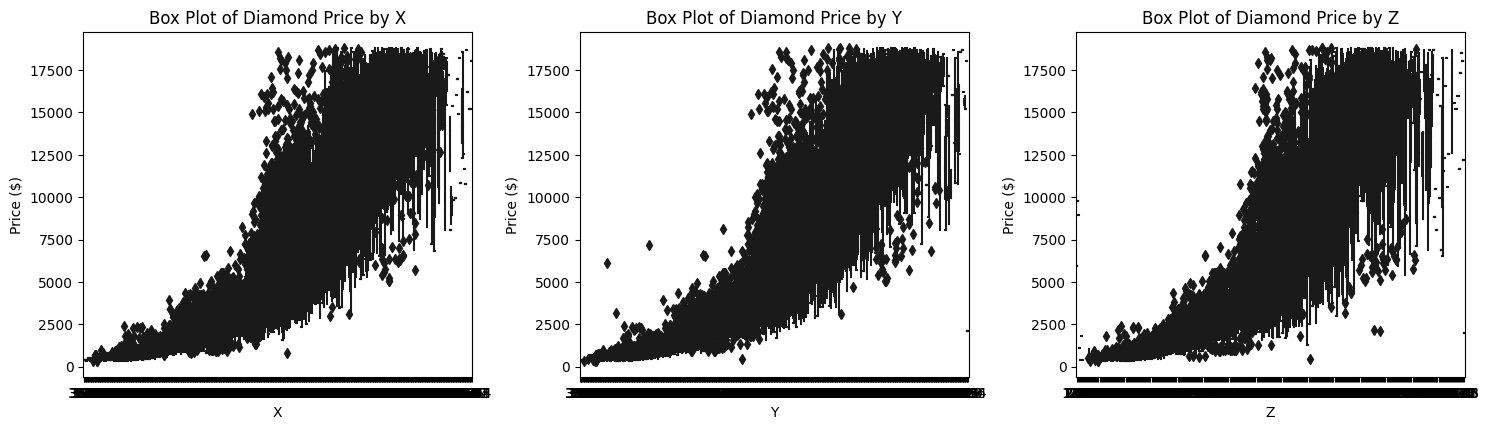

In [74]:
#Checking and handling outliers

# Selecting the features for the box plots
features = ['x', 'y', 'z']

# Creating subplots for all box plots
plt.figure(figsize=(15, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=feature, y='price', data=df, palette='viridis')
    plt.title(f'Box Plot of Diamond Price by {feature.capitalize()}')
    plt.xlabel(f'{feature.capitalize()}')
    plt.ylabel('Price ($)')

plt.tight_layout()
plt.show()

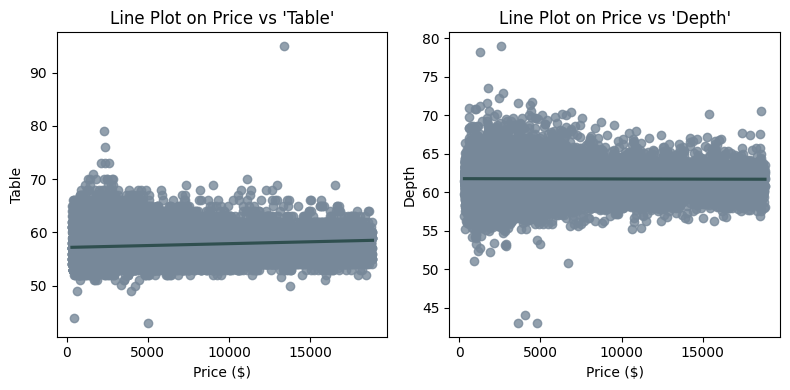

In [75]:
#Creating subplots for table and depth
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot for 'table'
sns.regplot(x="price", y="table", data=df, scatter_kws={"color": "#778899"}, line_kws={"color": "#2F4F4F"}, ax=axes[0])
axes[0].set_xlabel("Price ($)")
axes[0].set_ylabel("Table")
axes[0].set_title("Line Plot on Price vs 'Table'")

# Plot for 'depth'
sns.regplot(x="price", y="depth", data=df, scatter_kws={"color": "#778899"}, line_kws={"color": "#2F4F4F"}, ax=axes[1])
axes[1].set_xlabel("Price ($)")
axes[1].set_ylabel("Depth")
axes[1].set_title("Line Plot on Price vs 'Depth'")

plt.tight_layout()
plt.show()

Proceeding with the removal of outliers, which may be due to data entry errors or measurement inaccuracies, particularly in consideration of the dataset containing a significant amount of information, to prevent skewing of statistical analysis and modeling results.

In [76]:
# Handling the outliers

# Calculating z-scores for numeric columns
z_scores = stats.zscore(df[['x', 'y', 'z', 'table', 'depth']])

# Defining a threshold for z-score
threshold = 3
    
# Finding rows where any z-score exceeds the threshold
outliers = (abs(z_scores) > threshold).any(axis=1)

# Removing outliers
df2 = df[~outliers]
df2

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [77]:
# Feature Engineering
df2['volume'] = df2['x'] * df2['y'] * df2['z']

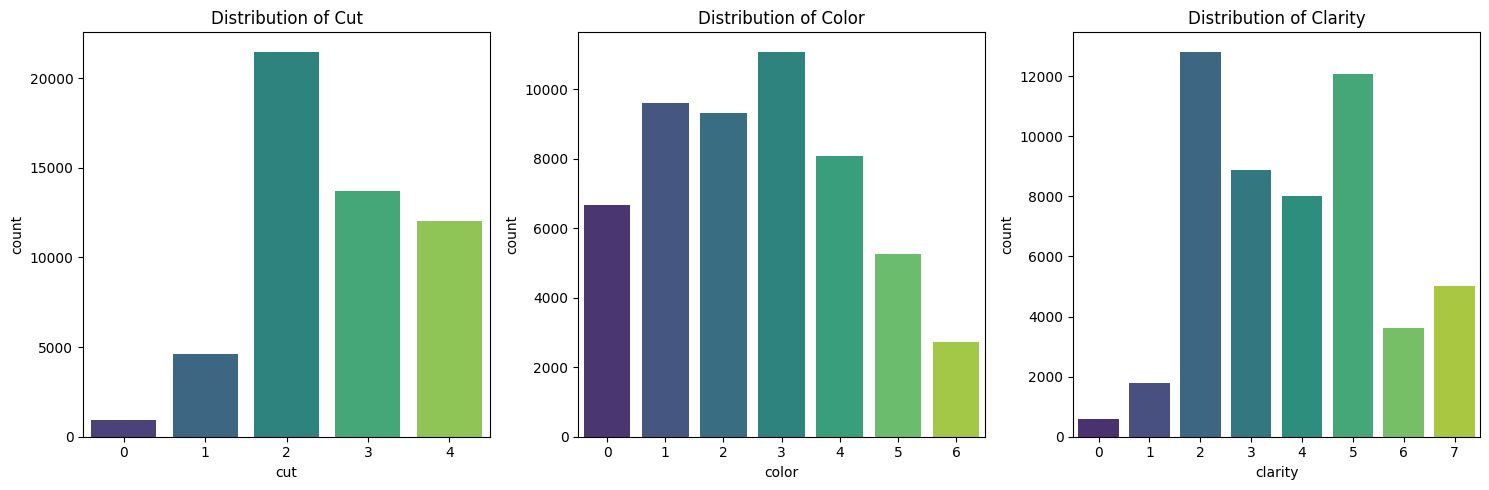

In [78]:
#Encoding for categorical variables.

# Applying label encoder to columns with categorical data
columns = ['cut','color','clarity']
label_encoder = LabelEncoder()
for col in columns:
    df2[col] = label_encoder.fit_transform(df2[col])
# Call the function with your DataFrame
create_barplots(df2)

### 4. Define Features and Target Variable:

In [79]:
# Spliting the dataset into features (X) and target variable (y)
X = df2.drop(columns=['price']) #features
y = df2['price']#target variable

In [80]:
X.head() 

,carat,cut,color,clarity,depth,table,x,y,z,volume
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,38.202030
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,34.505856
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,46.724580
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,51.917250
5,0.24,4,6,7,62.8,57.0,3.94,3.96,2.48,38.693952


### 5. Perform Basic EDA:

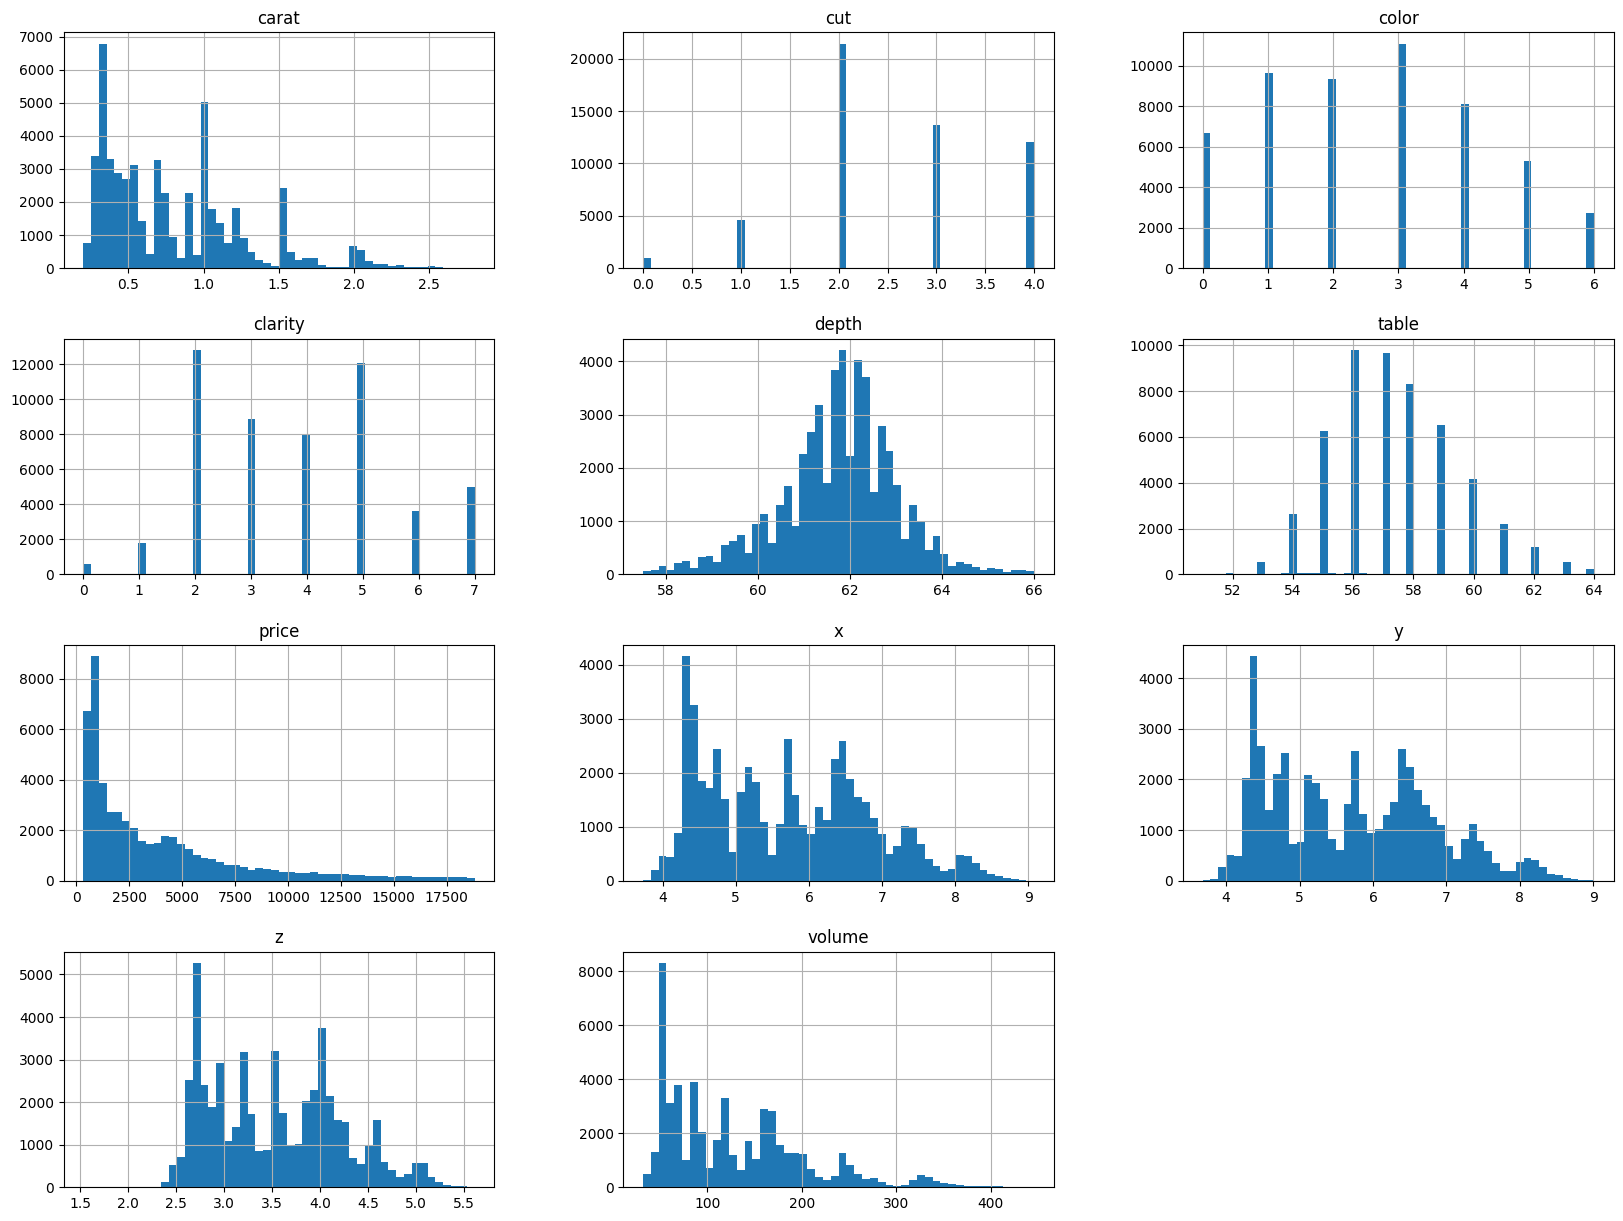

In [81]:
#Visualizing distribution of numerical attributes
df2.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

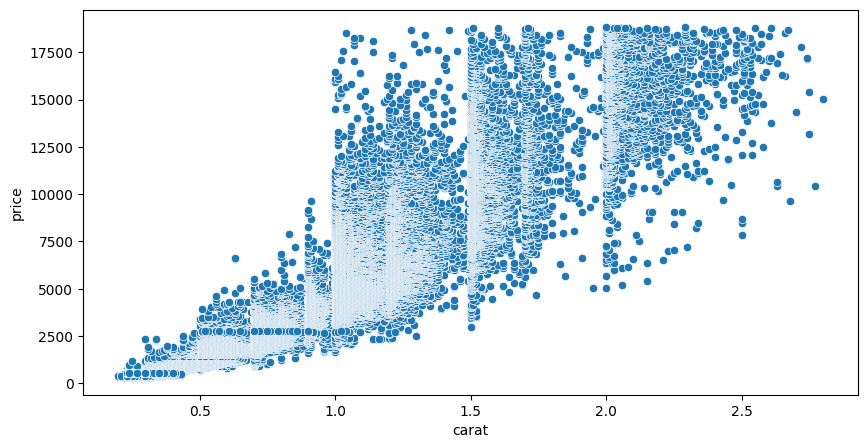

In [82]:
#Visualization of Price Variation with Carat Weight in Diamonds"
plt.figure(figsize=(10,5))
sns.scatterplot(x=df2['carat'], y=df2['price'])
plt.show()

In [83]:
df2

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,34.505856
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,51.917250
5,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48,38.693952
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50,115.920000
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61,118.110175
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56,114.449728
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74,140.766120


### 6. Create Heatmap:

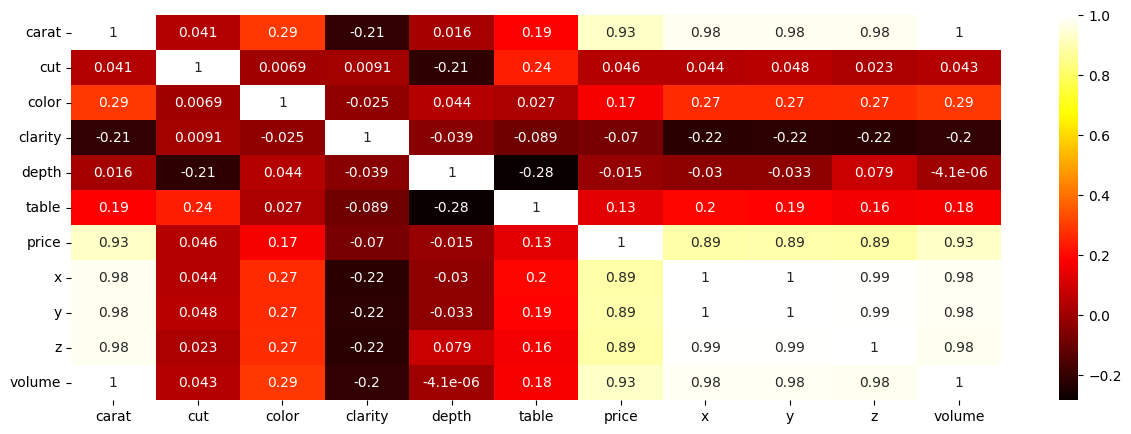

In [84]:
plt.figure(figsize=(15,5))
sns.heatmap(df2.corr(), cmap='hot', annot=True)
plt.show()

**Key observations:** 
-   The attributes "carat", "x", "y", and "z" has strong correlation with our target variable, price. 
-   The attributes "cut", "clarity", and "depth" display very low correlation (<|0.1|), suggesting they could be considered for removal. However, given the limited number of selected attributes, I will retain them for now. 

### 7. Split the Data into Train and Test Sets

In [85]:
from sklearn.model_selection import train_test_split

# Spliting the dataset into training and testing sets (80/20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (42229, 10)
Shape of X_test: (10558, 10)
Shape of y_train: (42229,)
Shape of y_test: (10558,)


### 8. Utilize Standard Scaling:

In [86]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z,volume
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,38.202030
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,34.505856
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,46.724580
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,51.917250
5,0.24,4,6,7,62.8,57.0,3.94,3.96,2.48,38.693952


In [87]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform the training features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features using the scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

In [88]:
X_train_scaled

array([[-0.22019612,  0.40973324, -0.94022699, ..., -0.08581004,
        -0.12194881, -0.24874863],
       [-0.26303594, -0.60046206,  0.82794295, ..., -0.05870075,
        -0.04915119, -0.2380327 ],
       [-0.45581514, -0.60046206, -0.94022699, ..., -0.41112158,
        -0.31122261, -0.47495795],
       ...,
       [-1.11983238, -0.60046206,  0.23855297, ..., -1.37801976,
        -1.38862732, -1.11198336],
       [-0.19877621,  0.40973324, -0.35083701, ..., -0.04966432,
        -0.10738928, -0.22629368],
       [ 0.55092068,  1.41992855,  0.23855297, ...,  0.69132307,
         0.76618211,  0.54145088]])

### 9.Perform Linear Regression:

#### 9.1 First Attempt:  Linear Regression model

In [89]:
#First model approach:

# Instantiate the linear regression model
model = LinearRegression()

# Fiting the model to the training data
model.fit(X_train_scaled, y_train)

# Predicting on the testing data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse=np.sqrt(mse)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 1540924.0646283838
R-squared Score: 0.902606748172752
Root Mean Squared Error: 1241.33962501339


In [90]:
df2['price'].describe()

count    52787.000000
mean      3920.036695
std       3983.314175
min        326.000000
25%        943.000000
50%       2387.000000
75%       5322.500000
max      18823.000000
Name: price, dtype: float64

**Note:** The initial linear regression model demonstrates promising performance, with an R-squared score of 0.90, indicating that 90.0% of the variability in diamond prices is captured by the model. The root mean squared error (RMSE) indicates an average deviation of $1,241.33 between predicted and actual prices. While these results are encouraging, further optimization may be explored for improved results.

#### 9.2 Different approach:  Linear Regression model

To enhace the performance of this model, I'll employ label encoding for the categorical attributes, scaling for numeric variables, polynomial features, and hyperparameter tuning using GridSearchCV. 

In [91]:
#Using the data before handling the outliers.

# Remove outliers based on price
df3 = df[df['price'] < 15000].reset_index(drop=True)

# Feature Engineering
df3['volume'] = df3['x'] * df3['y'] * df3['z']

In [92]:
df3.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [93]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

#Defining the categorical and numerical columns 
cat_cols = ['cut', 'color', 'clarity']
num_cols = ['carat', 'depth', 'table', 'x', 'y', 'z', 'volume']

#Spliting the Data into Features and Target Variable:
X = df3[cat_cols + num_cols]
y = df3['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


The next step involves preparing the data using a preprocessing pipeline. This process systematically organizes the data for analysis or modeling through standardized steps. Numerical features are standardized using StandardScaler to prevent any single feature from dominating the others. Categorical features are transformed into numerical values using OneHotEncoder, making them computer-readable. ColumnTransformer consolidates these transformations across the dataset. This ensures the data is properly formatted and ready for analysis or modeling.

In [94]:
# Creating preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

To enrich the dataset with polynomial combinations, a PolynomialFeatures transformer with degree 2 is created. This enables the capture of more complex relationships between the input features and the target variable ('Price')

In [96]:

# Add Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)

In [98]:
# Train Linear Regression Model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('polynomial', poly),
                           ('regressor', LinearRegression())])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'polynomial__degree': [1, 2],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Evaluate the model
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse=np.sqrt(mse)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 860653.1476872179
R-squared Score: 0.9193248737468097
Root Mean Squared Error: 927.7139363441825


In [108]:
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['carat',
                                                                          'depth',
                                                                          'table',
                                                                          'x',
                                                                          'y',
                                                                          'z',
                                                                          'volume']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity'])])),
                                       ('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('regressor', LinearRegression())]),
             n_jobs=-1, param_grid={'polynomial__degree': [1, 2]},
             scoring='neg_mean_squared_error')

The second linear regression model performed better than the first. With a substantially lower Mean Squared Error (860,653 compared to 1,540,924), higher R-squared score (0.919 compared to 0.903), and a reduced Root Mean Squared Error (927.71 compared to 1,241.34).The second approach provides more reliable predictions of the target variable compared to the first, making it the preferred choice for further analysis and decision-making in this project.